In [10]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
# 解决matplotlib显示中文问题
# 仅适用于Windows
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [3]:
# 加载数据
train_file = '../data/train.csv'
test_file = '../data/test.csv'

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### 查看数据

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [6]:
print('训练数据 {} 条'.format(len(train_data)))
print('测试数据 {} 条'.format(len(test_data)))

训练数据 7352 条
测试数据 2947 条


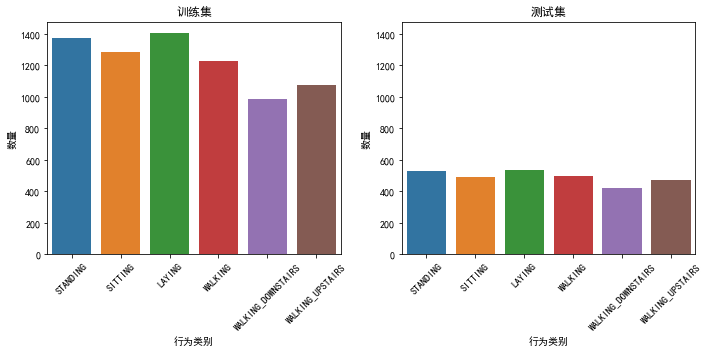

In [7]:
# 可视化各类别数量统计图
plt.figure(figsize=(10, 5))

# 训练集
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Activity', data=train_data)
plt.title('训练集')
plt.xlabel('行为类别')
plt.ylabel('数量')
plt.xticks(rotation='45')
# plt.subplots_adjust(bottom=0.25)  # 调整边界距离，显示完整图像。

# 测试集
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
sns.countplot(x='Activity', data=test_data)
plt.title('测试集')
plt.xlabel('行为类别')
plt.ylabel('数量')
plt.xticks(rotation='45')

plt.tight_layout()  # 显示完整图像

In [8]:
# 构建训练、测试数据集
# 特征处理
feat_name = train_data.columns[:-2].tolist()  # 取得特征
X_train = train_data[feat_name].values  # 根据特征取得训练数据集
X_test = test_data[feat_name].values  # 根据特征取得测试数据集
print('共 {} 维特征'.format(len(feat_name)))
print()

# 标签处理
train_labels = train_data['Activity'].values
test_labels = test_data['Activity'].values

# 使用sklearn.preprocessing.LabelEncoder进行类别标签处理
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(train_labels)
y_test = label_enc.fit_transform(test_labels)

print('类别标签：', label_enc.classes_)
print()

for i in range(len(label_enc.classes_)):
    print('编码 {} 对应 {}'.format(i, label_enc.inverse_transform(i)))

共 561 维特征

类别标签： ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']

编码 0 对应 LAYING
编码 1 对应 SITTING
编码 2 对应 STANDING
编码 3 对应 WALKING
编码 4 对应 WALKING_DOWNSTAIRS
编码 5 对应 WALKING_UPSTAIRS


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

### 数据建模和验证

In [9]:
from sklearn.neighbors import KNeighborsClassifier  # KNN 
from sklearn.linear_model import LogisticRegression  # 线性回归
from sklearn.svm import SVC  # SVM
from sklearn.tree import DecisionTreeClassifier  # 决策树

#### KNN

In [13]:
k_range = [5, 10, 15]
knn_models = []
knn_scores = []
knn_durations = []

for k in k_range:
    print('训练 kNN（k={}）...'.format(k))
    # 建立模型
    knn = KNeighborsClassifier(n_neighbors=k)
    # 训练模型
    start = time.time()
    knn.fit(X_train, y_train)
    # 计时
    end = time.time()
    duration = end - start
    print('耗时：{:.4f} s'.format(duration), end='，')
    # 验证模型
    score = knn.score(X_test, y_test)
    print('准确率：{:.3f}'.format(score))
    print()
    
    knn_models.append(knn)
    knn_durations.append(duration)
    knn_scores.append(score)

print()
knn_mean_duration = np.mean(knn_durations)
print('训练 KNN 平均耗时：{:.4f} s'.format(knn_mean_duration))

# 记录最优模型
best_idx = np.argmax(knn_scores)  # 最大值的 index
best_knn_acc = knn_scores[best_idx]
print('最优 KNN 模型，k={}，准确率：{:.3f}'.format(knn_models[best_idx].get_params()['n_neighbors'], best_knn_acc))

训练 kNN（k=5）...
耗时：0.3485 s，准确率：0.900

训练 kNN（k=10）...
耗时：0.3342 s，准确率：0.907

训练 kNN（k=15）...
耗时：0.3352 s，准确率：0.905


训练 KNN 平均耗时：0.3393 s
最优 KNN 模型，k=10，准确率：0.907


#### 逻辑回归

In [16]:
c_range = [0.01, 1, 100]
lr_models = []
lr_scores = []
lr_durations = []

for c in c_range:
    print('训练 Logistic Regression（C={}）...'.format(c), end='')
    # 建立模型
    lr_model = LogisticRegression(C=c)
    # 训练模型
    start = time.time()
    lr_model.fit(X_train, y_train)
    # 计时
    end = time.time()
    duration = end - start
    print('耗时 {:.4f} s'.format(duration), end='，')
    # 验证模型
    score = lr_model.score(X_test, y_test)
    print('准确率：{:.3f}'.format(score))
    print()
    
    lr_models.append(lr_model)
    lr_durations.append(duration)
    lr_scores.append(score)
    
print()
lr_mean_duration = np.mean(lr_durations)
print('训练 Logistic Regression 平均耗时：{:.3f}'.format(lr_mean_duration))

# 记录最优模型
best_idx = np.argmax(lr_scores)
best_lr_acc = lr_scores[best_idx]
print('最优的 Logistic Regression 模型：C={}，准确率：{:.3f}'.format(lr_models[best_idx].get_params()['C'], best_lr_acc))

训练 Logistic Regression（C=0.01）...耗时 3.4440 s，准确率：0.938

训练 Logistic Regression（C=1）...耗时 5.9099 s，准确率：0.962

训练 Logistic Regression（C=100）...耗时 10.2175 s，准确率：0.962


训练 Logistic Regression 平均耗时：6.524
最优的 Logistic Regression 模型：C=1，准确率：0.962


#### SVM

In [20]:
c_range = [100, 1000, 10000]
svm_models = []
svm_scores = []
svm_durations = []

for c in c_range:
    print('训练 SVM（C={}）...'.format(c), end='')
    # 建立模型
    svm_model = SVC(C=c)
    # 训练模型
    start = time.time()
    svm_model.fit(X_train, y_train)
    #计时
    end = time.time()
    duration = end - start
    print('耗时：{:.4f}'.format(duration), end='，')
    #验证模型
    score = svm_model.score(X_test, y_test)
    print('准确率：{:.4f}'.format(score))
    print()
    
    svm_models.append(svm_model)
    svm_scores.append(score)
    svm_durations.append(duration)
    
print()
svm_mean_duration = np.mean(svm_durations)
print('训练 SVM 平均时间：{:.4f}'.format(svm_mean_duration))

# 记录最优模型
best_idx = np.argmax(svm_scores)
best_svm_acc = svm_scores[best_idx]
print('最优的 SVM 模型：C={}，准确率：{:.4f}'.format(svm_models[best_idx].get_params()['C'], best_svm_acc))

训练 SVM（C=100）...耗时：2.1816，准确率：0.9647

训练 SVM（C=1000）...耗时：2.1626，准确率：0.9661

训练 SVM（C=10000）...耗时：2.1937，准确率：0.9688


训练 SVM 平均时间：2.1793
最优的 SVM 模型：C=10000，准确率：0.9688
